In [70]:
wdir = "/home/daniele/documents/github/ftt01/phd/projects/hydrological_forecasting/"


In [71]:
# IMPORTs
import sys
import os
import glob
import subprocess
import pandas as pd
from dask import dataframe as dd

from shutil import rmtree

# to link the lib in py scripts as well
os.chdir(wdir)
sys.path.insert(0, os.path.join(os.path.abspath(os.getcwd()), 'lib'))
from lib import *


In [72]:
# SETUP
# basins = ['passirio', 'plan']
basin = 'plan'
# variable = 'temperature'
variable = 'precipitation'

# init_ref = '03'
init_forecasting_hour = 9
lead_hours = 39
lag_hours = 24*7

output_type = 'mean'

start_date = '20210615'
end_date = '20210615'

In [73]:
start_date = dt.datetime.strptime(start_date, '%Y%m%d')
end_date = dt.datetime.strptime(end_date, '%Y%m%d')

dates = [start_date + dt.timedelta(days=x)
         for x in range(0, (end_date-start_date).days + 1)]


In [74]:
# date = '20210801'

In [75]:
# obs_data_path = "/media/windows/projects/hydrological_forecasting/machine_learning/data/observed/" + \
#     basin + "/" + variable + "/daily/"

In [76]:
# obs = pd.read_csv( obs_data_path + date + ".csv", sep=';', parse_dates=['datetime'] )
# obs.set_index('datetime', inplace=True)

# fct = pd.read_csv( fct_data_path + date + ".csv", sep=';', parse_dates=['datetime'] )
# fct.set_index('datetime', inplace=True)

# filled = pd.read_csv( filled_path + date + ".csv", sep=';', parse_dates=['datetime'] )
# filled.set_index('datetime', inplace=True)

# unbiased = pd.read_csv( unbiased_path + date + ".csv", sep=';', parse_dates=['datetime'] )
# unbiased.set_index('datetime', inplace=True)

# concat = pd.read_csv( concatenated_path + date + ".csv", sep=';', parse_dates=['datetime'] )
# concat.set_index('datetime', inplace=True)

In [77]:
# concat.plot()

In [78]:
# obs.plot()

In [79]:
fct_data_path = "/media/windows/projects/hydrological_forecasting/machine_learning/data/forecast/icon-d2-eps_45h/postprocess/" + \
    basin + "/" + variable + "/" + output_type + "/"
filled_path = "/media/windows/projects/hydrological_forecasting/machine_learning/data/observed/" + \
    basin + "/" + variable + "/daily/fullfilled/" + output_type + "/"
unbiased_path = "/media/windows/projects/hydrological_forecasting/machine_learning/data/observed/"  + \
    basin + "/" + variable + "/" + "/daily/unbiased/" + output_type + "/"
concatenated_path = "/media/windows/projects/hydrological_forecasting/machine_learning/data/observed/"  + \
    basin + "/" + variable + "/" + "daily/concatenated/" + output_type + "/"

In [80]:
print(concatenated_path)

/media/windows/projects/hydrological_forecasting/machine_learning/data/observed/plan/precipitation/daily/concatenated/mean/


In [81]:
# filled.plot()

In [82]:
# unbiased.plot()

<AxesSubplot:xlabel='datetime'>

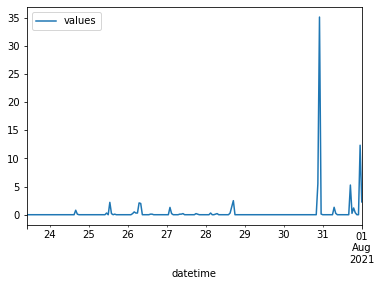

In [83]:
date = '20210730'

concatenated_file_path = "/media/windows/projects/hydrological_forecasting/machine_learning/data/observed/" + \
    basin + "/" + variable + "/" + "daily/concatenated/" + output_type + "/" + date + ".csv"

concat = pd.read_csv(concatenated_file_path, sep=';', parse_dates=['datetime'])
concat.set_index('datetime', inplace=True)

concat.plot()


<AxesSubplot:xlabel='datetime'>

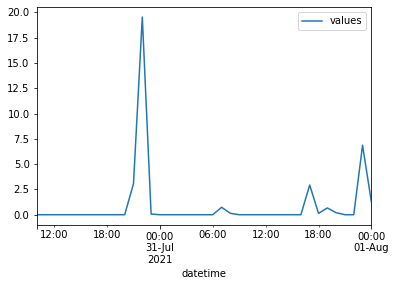

In [84]:
filled_path = "/media/windows/projects/hydrological_forecasting/machine_learning/data/observed/" + \
    basin + "/" + variable + "/daily/fullfilled/" + output_type + "/" + date + ".csv"

filled = pd.read_csv(filled_path, sep=';', parse_dates=['datetime'])
filled.set_index('datetime', inplace=True)

filled.plot()


In [85]:
fct_list = glob.glob( concatenated_path + '*.csv' )

In [86]:
fct_list

['/media/windows/projects/hydrological_forecasting/machine_learning/data/observed/plan/precipitation/daily/concatenated/mean/20210615.csv',
 '/media/windows/projects/hydrological_forecasting/machine_learning/data/observed/plan/precipitation/daily/concatenated/mean/20210616.csv',
 '/media/windows/projects/hydrological_forecasting/machine_learning/data/observed/plan/precipitation/daily/concatenated/mean/20210617.csv',
 '/media/windows/projects/hydrological_forecasting/machine_learning/data/observed/plan/precipitation/daily/concatenated/mean/20210618.csv',
 '/media/windows/projects/hydrological_forecasting/machine_learning/data/observed/plan/precipitation/daily/concatenated/mean/20210619.csv',
 '/media/windows/projects/hydrological_forecasting/machine_learning/data/observed/plan/precipitation/daily/concatenated/mean/20210620.csv',
 '/media/windows/projects/hydrological_forecasting/machine_learning/data/observed/plan/precipitation/daily/concatenated/mean/20210621.csv',
 '/media/windows/pro

In [87]:
# output_path = concatenated_path
# outfile = output_path + 'comparison/' + date + "." + output_format
# mkNestedDir(os.path.dirname(outfile))

# outfile_hd = output_path + 'comparison/HD/' + date + "." + output_format
# mkNestedDir(os.path.dirname(outfile_hd))

import matplotlib.dates as mdates

plots = []
for fct_el in fct_list:

    el = pd.read_csv(fct_el, sep=';', parse_dates=['datetime'])
    el.set_index('datetime', inplace=True)

    plt_conf = {}
    plots.append((el, plt_conf))

x_major_formatter = mdates.DateFormatter('%m-%dT%H')

outfile = concatenated_path + 'comparison.' + output_format

createPlot(plots, "Time $[hour]$", 'Prec. [$mm/hour$]', outfile,
           x_major_formatter=x_major_formatter, my_dpi=50, height=80)

outfile_hd = concatenated_path + 'comparison_HD.' + output_format

createPlot(plots, "Time $[hour]$", 'Prec. [$mm/hour$]', outfile_hd,
           x_major_formatter=x_major_formatter, my_dpi=600, height=80)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [69]:
fct_el

'/media/windows/projects/hydrological_forecasting/machine_learning/data/observed/plan/precipitation/daily/concatenated/mean/20211014.csv'

In [ ]:
import matplotlib.dates as mdates
plots = []

# plt_conf = {}
# plt_conf["label"] = 'Observed'
# plt_conf["color"] = '#e66101'
# plots.append( (df_obs, plt_conf) )

plt_conf = {}
plt_conf["label"] = 'ICON forecast'
plt_conf["color"] = '#8078bc'
plots.append((df_fct, plt_conf))

x_major_formatter = mdates.DateFormatter('%m-%dT%H')

outfile = output_path + 'comparison/' + date + "." + output_format

print(outfile)
mkNestedDir(os.path.dirname(outfile))
createPlot(plots, "Time $[hour]$", 'Prec. [$mm/hour$]', outfile,
           x_major_formatter=x_major_formatter, my_dpi=50, height=80)

outfile_hd = output_path + 'comparison/HD/' + date + "." + output_format
mkNestedDir(os.path.dirname(outfile_hd))
createPlot(plots, "Time $[hour]$", 'Prec. [$mm/hour$]', outfile_hd,
           x_major_formatter=x_major_formatter, my_dpi=600, height=80)

<AxesSubplot:>

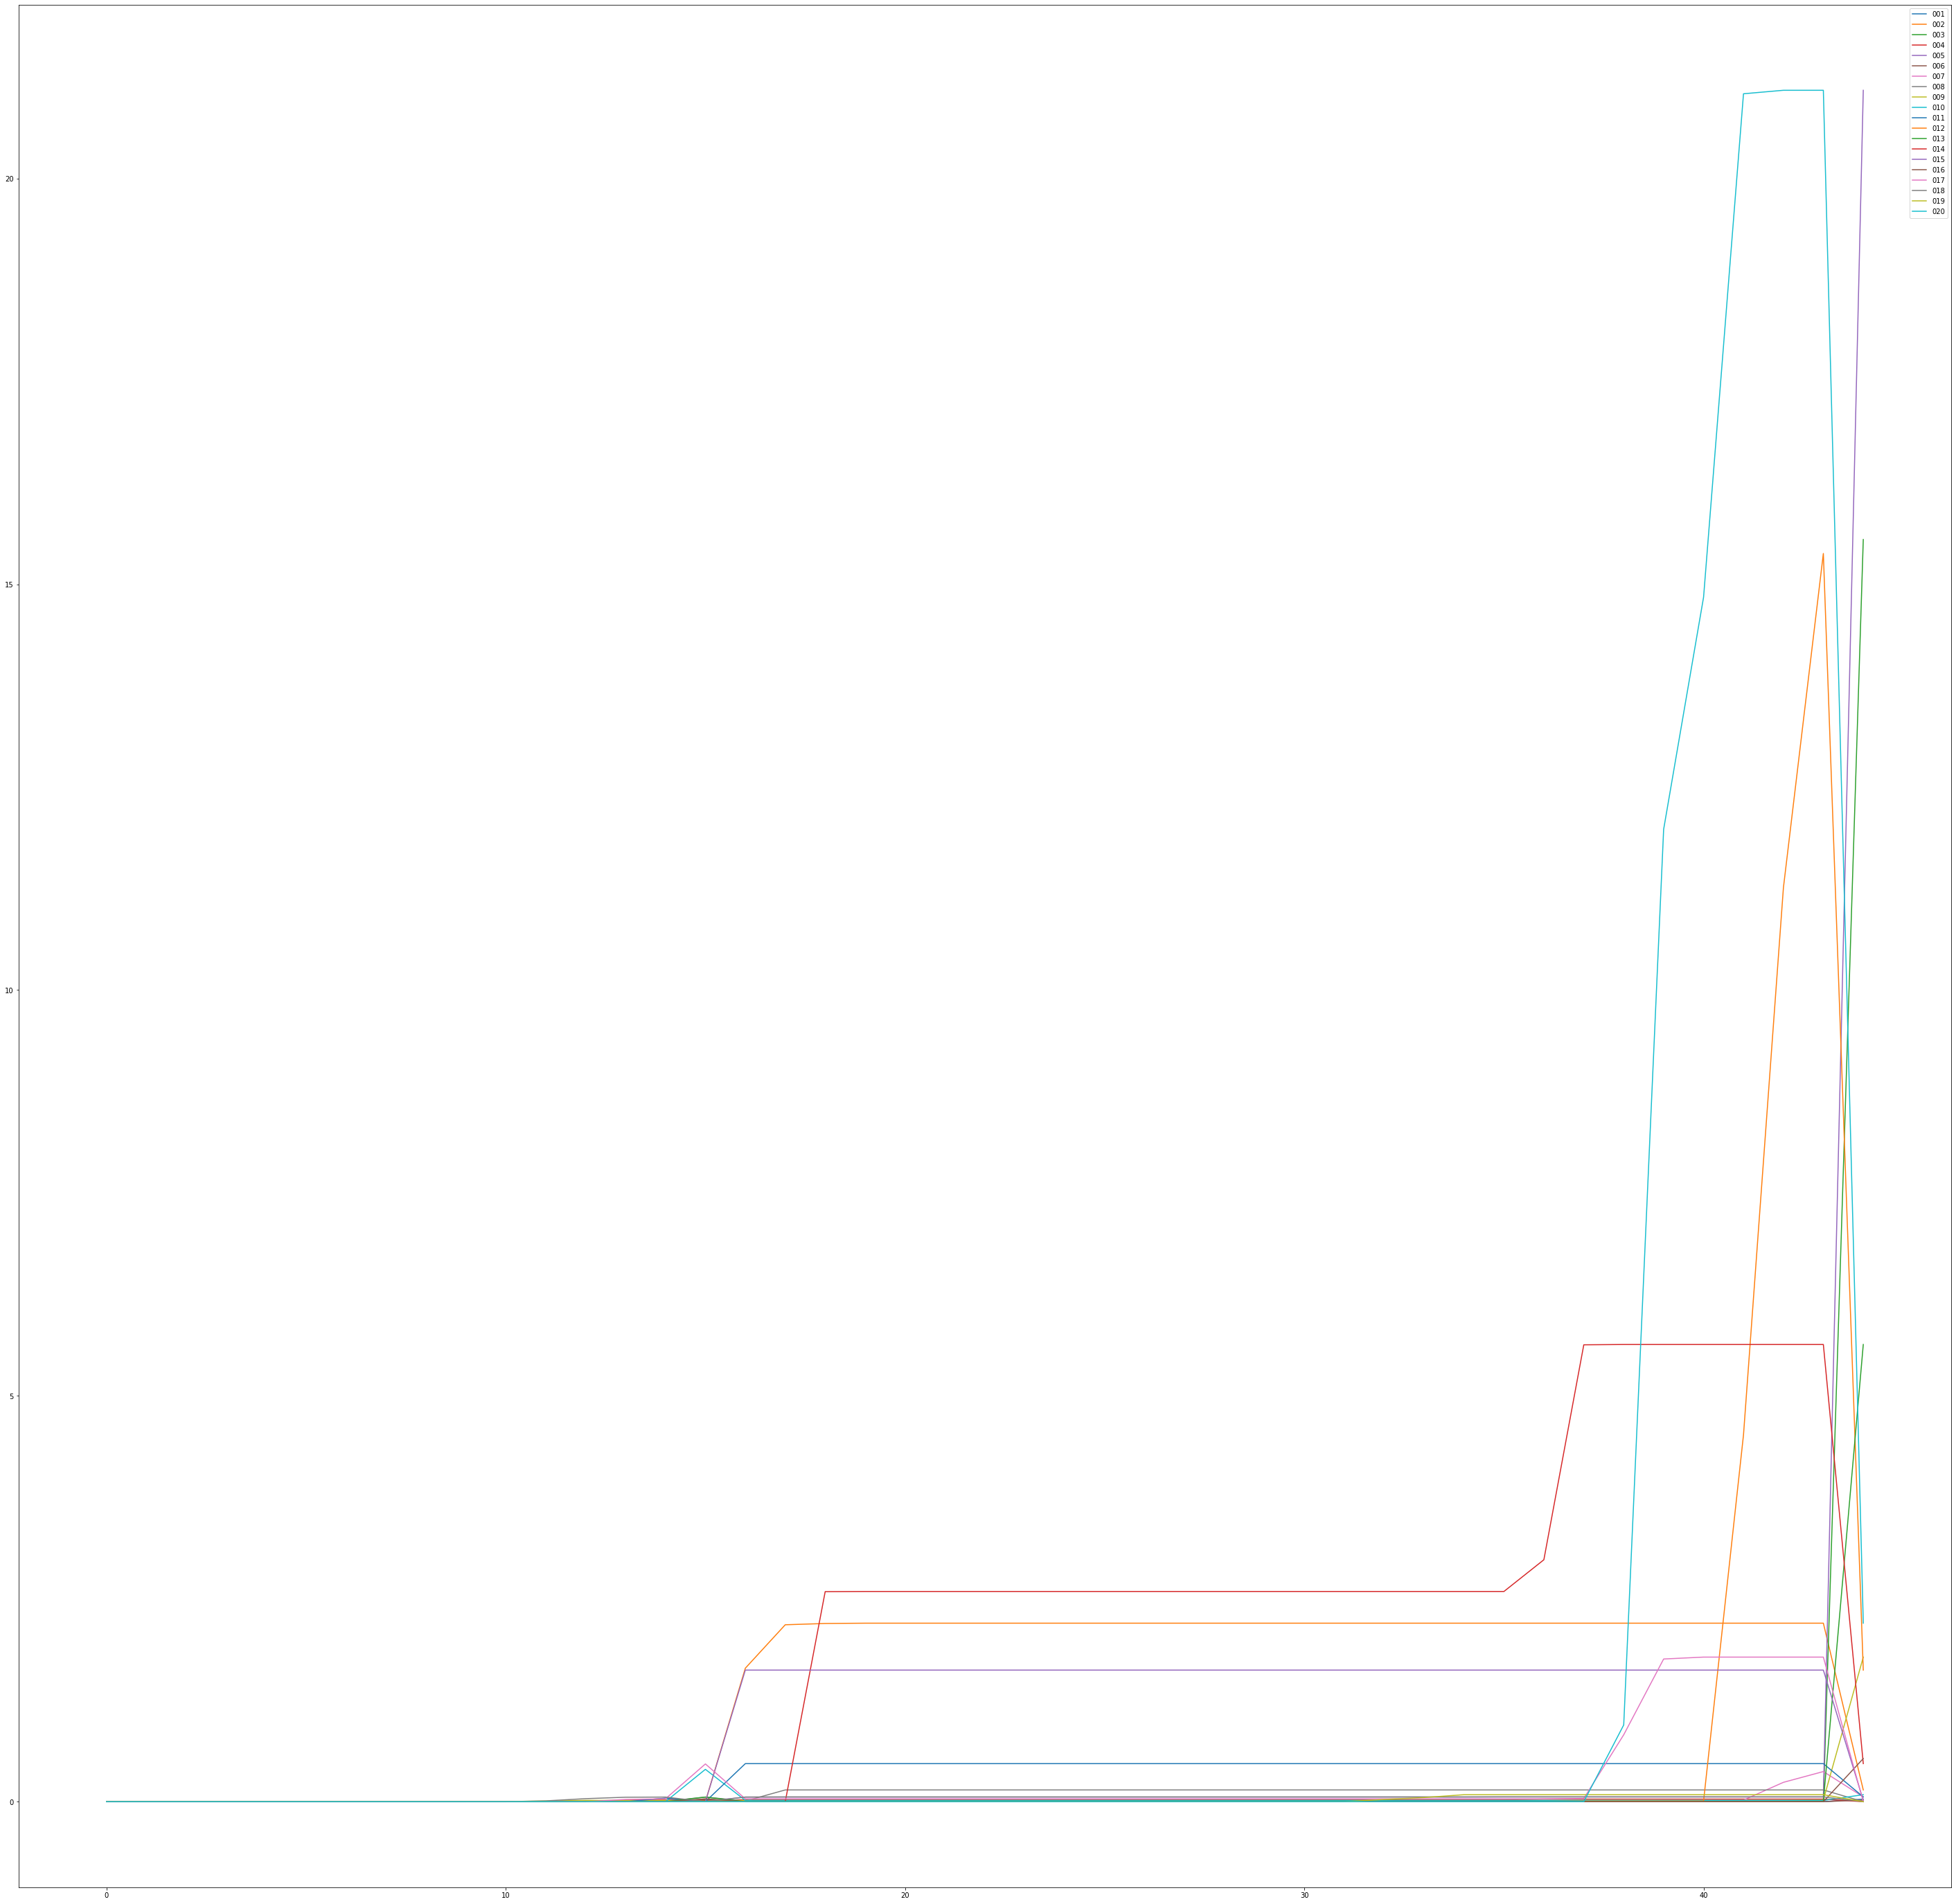

In [10]:
date = '20210616'

concatenated_file_path = "/media/windows/projects/hydro_forecasting/machine_learning/data/forecast/icon-d2-eps_45h/postprocess_original/plan/precipitation/ensemble/116/" + date + ".csv"

import pandas as pd

data = pd.read_csv(concatenated_file_path, parse_dates=True, sep=";")

data.plot( figsize=(50, 50) )